# ARJAV TONGIA (EN19CS303013)

### Kaggle Link : https://www.kaggle.com/arjavtongia/titanic-survival-analysis

### Github Link: 

## Overview of the File:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df1 = pd.read_csv('/kaggle/input/titanic/train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
survival_df = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
survival_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
df2 = test_df.merge(survival_df, on='PassengerId')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [6]:
df =  pd.concat([df1, df2])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [8]:
df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [9]:
df['Age'].fillna(method ='ffill', inplace=True)
df.dropna(inplace=True)

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## Q. Does pclass or sex have any effect on survival rate?

In [11]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.573209
1,2,0.422383
2,3,0.269774


<AxesSubplot:>

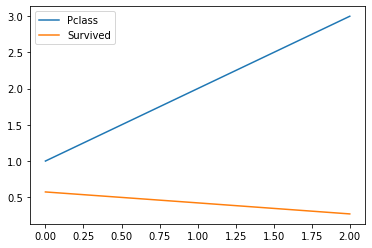

In [12]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot()

In [13]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.825431
1,male,0.129454


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

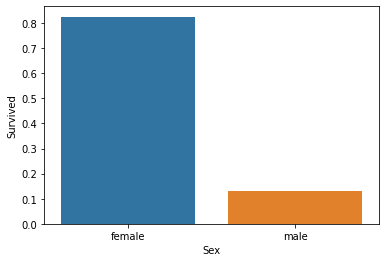

In [14]:
sns.barplot(x='Sex', y='Survived', data=df[['Sex', 'Survived']].groupby(['Sex'], as_index=False)['Survived'].mean())

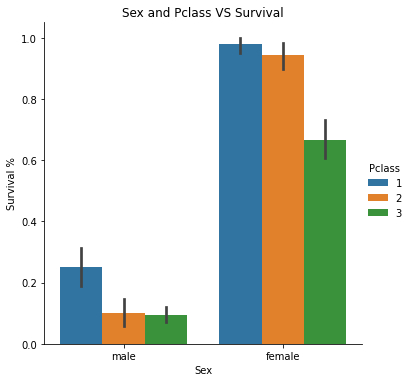

In [15]:
sns.catplot(x='Sex', y='Survived', hue='Pclass', data=df, kind='bar')
plt.ylabel('Survival %')
plt.title('Sex and Pclass VS Survival')
plt.show()

#### Ans: There is negative corelaton between Pclass and Survival rate, suviaval rate is decreasing with increase in Pclass. And females have highest chances of survival as male send female first.

## Q. Which group of people survived the most?

In [16]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [17]:
for i in df:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.377049
1,Miss,0.790875
2,Mr,0.107143
3,Mrs,0.868020
4,Rare,0.310345


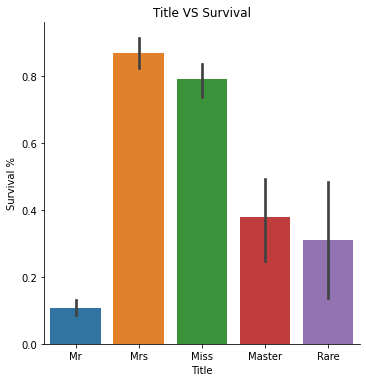

In [18]:
sns.catplot(x='Title', y='Survived', data=df, kind='bar')
plt.ylabel('Survival %')
plt.title('Title VS Survival')
plt.show()

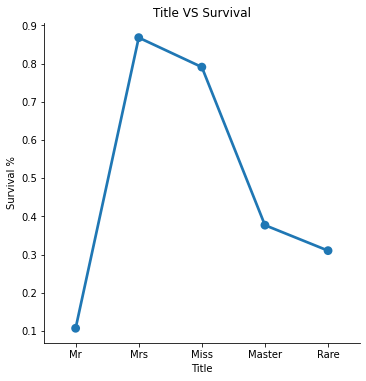

In [19]:
sns.catplot(x='Title', y='Survived', data=df, kind='point', kde=False, ci=None)
plt.ylabel('Survival %')
plt.title('Title VS Survival')
plt.show()

#### Ans: Ladies and Kids survived the most

## Q. Which age group have highest chances of survived?

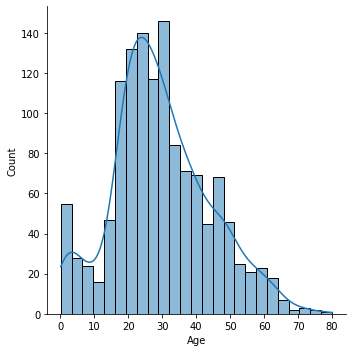

In [20]:
sns.displot(df['Age'], kde=True)
plt.show()

In [21]:
ranges = [0, 10, 20, 30, 40, 50, 60, np.inf]
label = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']

df['Age group'] = pd.cut(df['Age'], bins=ranges, labels=label)

In [22]:
df.groupby('Age group')['Survived'].mean()

Age group
0-10     0.544643
10-20    0.395939
20-30    0.331858
30-40    0.390977
40-50    0.341317
50-60    0.405063
60+      0.303030
Name: Survived, dtype: float64

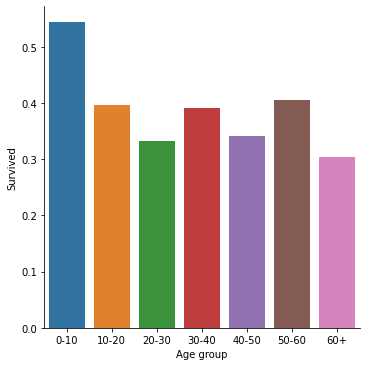

In [23]:
sns.catplot(x='Age group', y='Survived', data=df.groupby('Age group', as_index=False)['Survived'].mean(), kind='bar')
plt.show()

#### Ans: Age grop of people 0-10 have highest chance of survival

## Q. Which Family size have highest chances of survival?

In [24]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.720930
2,3,0.559748
1,2,0.531915
6,7,0.312500
0,1,0.290978
4,5,0.227273
5,6,0.200000
8,11,0.181818
7,8,0.125000


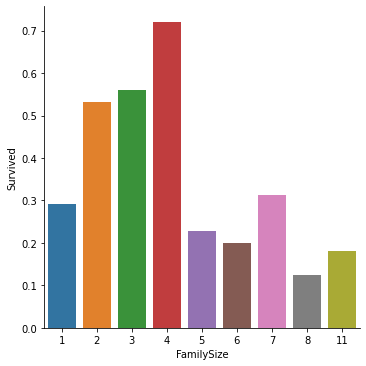

In [25]:
sns.catplot(x='FamilySize', y='Survived', data=df, kind='bar', ci=None)
plt.show()

#### Ans: Family with 4 members have highest chamce of survival

## Q. Is being alone increase chances of survival?

In [26]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.506744
1,1,0.290978


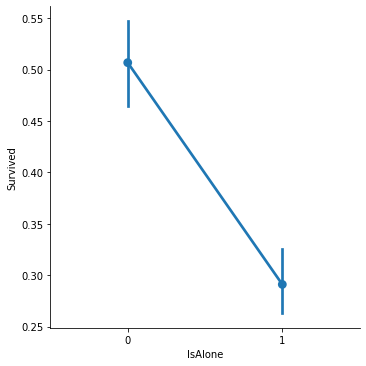

In [27]:
sns.catplot(x='IsAlone', y='Survived', data=df, kind='point')

#### Ans: No, it Doesn't have any significant impact

## Model

In [28]:
train_df = df.drop(['PassengerId', 'Name'], axis=1)

In [29]:
train_df['Age group'] = train_df['Age group'].astype('object')

In [30]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in train_df.columns:
    # Compare if the dtype is object
    if train_df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        train_df[col]=le.fit_transform(df[col])

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    1306 non-null   int64  
 1   Pclass      1306 non-null   int64  
 2   Sex         1306 non-null   int64  
 3   Age         1306 non-null   float64
 4   SibSp       1306 non-null   int64  
 5   Parch       1306 non-null   int64  
 6   Fare        1306 non-null   float64
 7   Embarked    1306 non-null   int64  
 8   Title       1306 non-null   int64  
 9   Age group   1306 non-null   int64  
 10  FamilySize  1306 non-null   int64  
 11  IsAlone     1306 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 164.9 KB


In [32]:
from sklearn.ensemble import RandomForestClassifier

X = train_df.drop('Survived', axis=1)
y = train_df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
model = RandomForestClassifier(n_estimators=200)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
print("Train score:")
print(model.score(X_train, y_train))

print("Test score:")
print(model.score(X_test, y_test))

Train score:
0.9890590809628009
Test score:
0.8112244897959183


In [35]:
model.feature_importances_

array([0.04147769, 0.32069865, 0.14256966, 0.02541512, 0.0183285 ,
       0.16088897, 0.02504536, 0.1687019 , 0.04347108, 0.04129597,
       0.01210709])

In [36]:
coeff_df = pd.DataFrame(model.feature_importances_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
Sex,0.320699
Title,0.168702
Fare,0.160889
Age,0.142570
Age group,0.043471
Pclass,0.041478
FamilySize,0.041296
SibSp,0.025415
Embarked,0.025045
Parch,0.018329


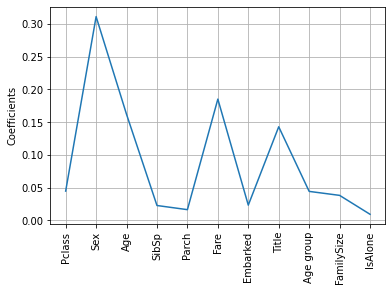

In [37]:
names = train_df.drop('Survived', axis=1).columns
importance = model.fit(X, y).feature_importances_
_ = plt.plot(range(len(names)), importance)
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.grid(True)
plt.show()

#### Sex, Fare and Age impacts survival most 